In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.optim.sgd import SGD
from torch.nn.parameter import Parameter
from IPython.display import display
import matplotlib.pyplot as plt
import tqdm

/home/zhangjx/anaconda3/envs/deeplearning/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# 定义数据集
class my_dataset(Dataset):
    def __init__(self):
        super(my_dataset,self).__init__()
        self.path = '../../data/z=wxx.npy'
        self.data = np.load(self.path)
    def __getitem__(self, index):
        return np.array(self.data[index],dtype=np.float32)
    
    def __len__(self):
        return self.data.shape[0]

In [12]:
# 定义模型
class my_model(nn.Module):
    def __init__(self,dim_hidden=1):
        super(my_model,self).__init__()
        self.linear1 = nn.Linear(1,dim_hidden,bias=False)
        self.linear2 = nn.Linear(dim_hidden,1,bias=False)
        self.relu = nn.ReLU(inplace=True)
        self.gelu = nn.GELU()
        self.sigmoid = nn.Sigmoid()
        # self.bn0 = nn.BatchNorm1d(2)
        self.bn1 = nn.BatchNorm1d(dim_hidden)
        self.bn2 = nn.BatchNorm1d(dim_hidden)
    def forward(self, x):
        # x = self.bn0(x)
        x = self.linear1(x)
        x = self.bn1(x)
        self.relu(x)
        x = self.linear2(x)
        return x

In [8]:
class Loss(nn.Module):
    def __init__(self):
        super(Loss, self).__init__()
    
    def forward(self, x, y):
        distance = 1/2 * (y - x) ** 2
        loss = torch.sum(distance)
        loss_mean = loss / x.shape[0]
        return loss_mean

In [9]:
batch_size = 100
num_workers = 0
lr = 0.005
epochs = 10000

In [13]:
my_data = my_dataset()
my_dataloader = DataLoader(my_data,batch_size,num_workers=num_workers,drop_last=True,shuffle=True)
model = my_model(2)
loss_f = Loss()
# 定义优化器
optimizer = SGD(model.parameters(),lr=lr)

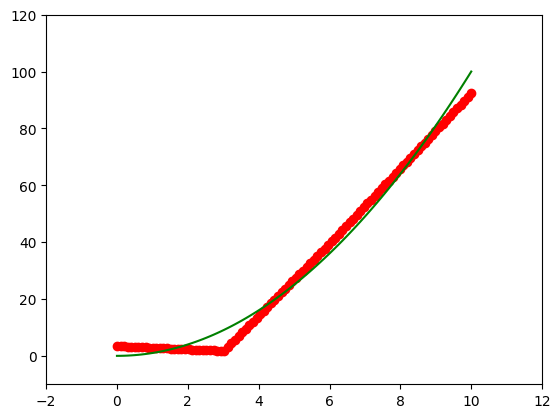

Processing 5.6610:   4%|▍         | 382/10000 [01:21<34:09,  4.69it/s]   


KeyboardInterrupt: 

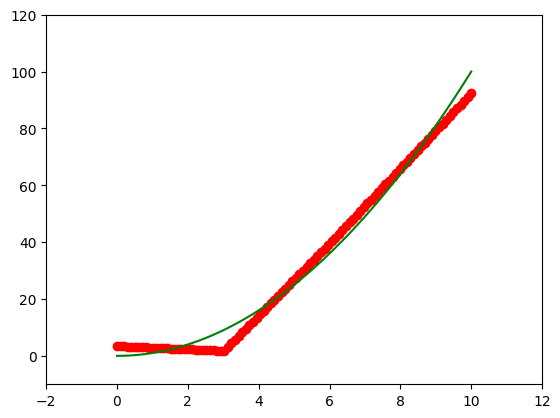

In [14]:
x = np.linspace(0,10,100).astype(np.float32)
y = x*x
x_input = torch.tensor(x).unsqueeze(-1)
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlim(-2, 12)
ax.set_ylim(-10, 120)
display(fig, display_id='plot')
for data in my_dataloader :
    pass
pbar = tqdm.tqdm(range(epochs))
for epoch in pbar:
    output = model(data[:,:-1])
    loss = loss_f(output, data[:,-1:])
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    pbar.set_description("Processing %.4f" % loss.item())
    with torch.no_grad():
        output = model(x_input)
    
    ax.set_xlim(-2, 12)
    ax.set_ylim(-10, 120)
    ax.scatter(x,output[:,0].numpy(),marker='o', c='r')
    ax.plot(x, y, color='green')
    # ax.plot(data_true[:,0], data_true[:,1], color='red')
    display(fig, display_id='plot',update=True)
    ax.clear()